In [2]:
#importing the necessary libraries to execute our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#defining variables, importing and reading data. it = itaú, bb= bank of Brazil; data time: from over the last 5 years
it = pd.read_csv('itsa.csv')
bb = pd.read_csv('bb.csv')
it.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-27,8.09818,8.21014,7.98622,8.06832,5.851368,23752772.0
1,2015-04-28,8.12803,8.15043,7.97130,8.01608,5.813481,26826692.0
2,2015-04-29,7.97876,7.98622,7.87427,7.97876,5.786416,16316842.0
3,2015-04-30,7.97130,8.03847,7.83695,7.91905,5.743111,21890440.0
4,2015-05-04,8.03847,8.10564,7.97130,7.99369,5.797244,13699260.0


In [7]:
bb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-27,27.000000,27.280001,26.299999,26.400000,20.357279,8016900.0
1,2015-04-28,26.590000,26.660000,25.780001,26.500000,20.434393,4848200.0
2,2015-04-29,26.299999,26.350000,25.850000,26.000000,20.048840,5125500.0
3,2015-04-30,25.850000,26.620001,25.610001,26.620001,20.526926,7232900.0
4,2015-05-04,26.809999,26.959999,26.410000,26.440001,20.388130,4512000.0


In [13]:
#general statistic describe of the values in each dataset-BB
bb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,32.801168,33.285584,32.263868,32.762361,29.816567,1.028356e+07
std,11.619385,11.699336,11.505781,11.611483,11.997609,5.929567e+06
min,12.620000,12.840000,12.520000,12.700000,10.609064,0.000000e+00
25%,23.410000,23.660000,22.900000,23.340000,19.314568,6.702100e+06
50%,31.180000,31.650000,30.700001,31.170000,28.149090,9.033600e+06
75%,43.770000,44.299999,43.040001,43.700001,40.543053,1.221260e+07
max,55.599998,55.910000,54.820000,55.180000,53.052986,7.397800e+07


In [15]:
#ITAU
it.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,9.569803,9.680418,9.445159,9.563640,8.418357,2.205057e+07
std,2.471475,2.484167,2.448980,2.471837,2.861009,1.194011e+07
min,5.155960,5.213440,5.131330,5.155960,3.891884,0.000000e+00
25%,7.486820,7.577950,7.396510,7.513920,5.825108,1.458182e+07
50%,9.360000,9.460000,9.209090,9.345450,8.172130,1.956636e+07
75%,11.980000,12.100000,11.827300,11.980000,11.051497,2.671110e+07
max,14.200000,14.380000,14.120000,14.350000,14.081749,1.169007e+08


In [16]:
#When we look to the std, ITSA seems much less volatile than BBAS3


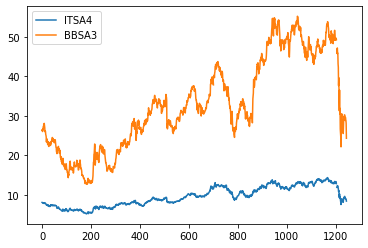

In [23]:
#Let´s do a graphic comparison
it['Close'].plot(label = 'ITSA4')
bb['Close'].plot(label = 'BBSA3')
plt.legend()
plt.show()


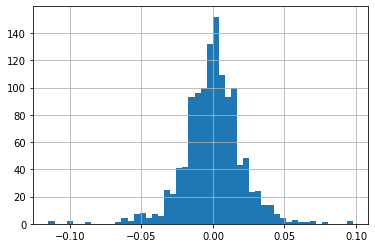

In [27]:
#As we can see, Itau stock behavior is near to a normal distribution one
it['LogReturn'] = np.log(it['Close']).shift(-1)-np.log(it['Close'])
it['LogReturn'].hist(bins=50)

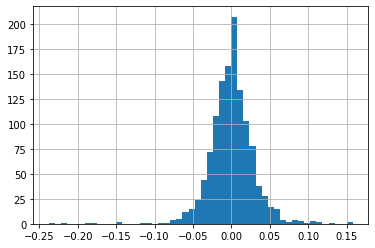

In [30]:
#now let´s check BB
bb['LogReturn'] = np.log(bb['Close']).shift(-1)-np.log(bb['Close'])
bb['LogReturn'].hist(bins=50)

In [51]:
#now, we will see the probability of ITAU to drop 1% in a day
from scipy.stats import norm
mu_it = it['LogReturn'].mean()
sigma_it = it['LogReturn'].std(ddof=1)
prob1_it = norm.cdf(-0.1,mu_it,sigma_it)
print('The probability of ITSA4 dropping 10% a day is',prob1_it)

The probability of ITSA4 dropping 10% a day is 3.601977292893265e-07


In [53]:
#repeating with BB
mu_bb = bb['LogReturn'].mean()
sigma_bb = bb['LogReturn'].std(ddof=1)
prob1_bb = norm.cdf(-0.1,mu_bb,sigma_bb)
print('The probability of Bank of Brazil dropping 10% a day is',prob1_bb)

The probability of Bank of Brazil dropping 10% a day is 0.0004981049577951553


In [56]:
#VAR calculating of ITAU
var_it = norm.ppf(0.05,mu_it,sigma_it)
print('var of',var_it )
print('5% quantile ', norm.ppf(0.05, mu_it, sigma_it))
print('95% quantile ', norm.ppf(0.95, mu_it, sigma_it))

var of -0.03314617555742498
5% quantile  -0.03314617555742498
95% quantile  0.03327913282971352


In [59]:
#var calculating of BB
var_bb = norm.ppf(0.05,mu_bb,sigma_bb)
print('var of',var_bb )
print('5% quantile ', norm.ppf(0.05, mu_bb, sigma_bb))
print('95% quantile ', norm.ppf(0.95, mu_bb, sigma_bb))

var of -0.04999029085055418
5% quantile  -0.04999029085055418
95% quantile  0.04991447476870742


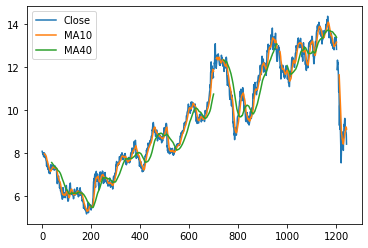

In [75]:
#introducing trading metrics, moving averages for ITSA4 and BB, plotting only ITSA4
it['MA10']= it['Close'].rolling(10).mean()
it['MA40']= it['Close'].rolling(40).mean()
it['Close'].plot()
it['MA10'].plot()
it['MA40'].plot()
plt.legend()
bb['MA10']= bb['Close'].rolling(10).mean()
bb['MA40']= bb['Close'].rolling(40).mean()

In [77]:
it['Shares'] = [1 if it.loc[ei,'MA10']>it.loc[ei,'MA40']else 0
                for ei in it.index]
it.tail()
bb['Shares'] = [1 if bb.loc[ei,'MA10']>bb.loc[ei,'MA40']else 0
                for ei in bb.index]
bb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,LogReturn,Close1,MA10,MA40,Shares
1239,2020-04-17,29.549999,30.059999,29.030001,29.580000,29.580000,18615000.0,-0.020148,28.990000,29.039,NaN,0
1240,2020-04-20,29.000000,29.490000,28.520000,28.990000,28.990000,17775000.0,-0.004494,28.860001,29.388,NaN,0
1241,2020-04-22,28.889999,29.150000,28.629999,28.860001,28.860001,20198900.0,-0.028468,28.049999,29.488,NaN,0
1242,2020-04-23,29.200001,29.629999,27.610001,28.049999,28.049999,21708800.0,-0.143512,24.299999,29.376,NaN,0
1243,2020-04-24,27.629999,27.700001,24.000000,24.299999,24.299999,73978000.0,NaN,NaN,28.833,32.10075,0


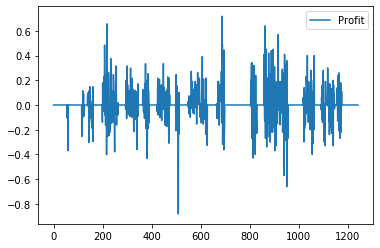

In [80]:
#creating the variable profit to understand ITSA4 profit returns
it['Close1'] = it['Close'].shift(-1)
it.iloc[1000:1200,:]
it['Profit'] = [it.loc[ei,'Close1']-it.loc[ei,'Close']
                if it.loc[ei,'Shares']==1
                else 0 for ei in it.index]
it['Profit'].plot()
plt.legend()


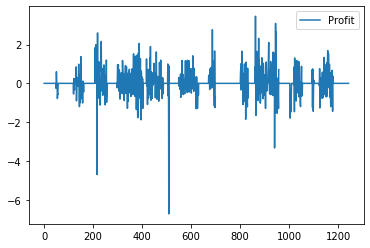

In [82]:
#comparing with BB
bb['Close1'] = bb['Close'].shift(-1)
bb.iloc[1000:1200,:]
bb['Profit'] = [bb.loc[ei,'Close1']-bb.loc[ei,'Close']
                if bb.loc[ei,'Shares']==1
                else 0 for ei in bb.index]
bb['Profit'].plot()
plt.legend()

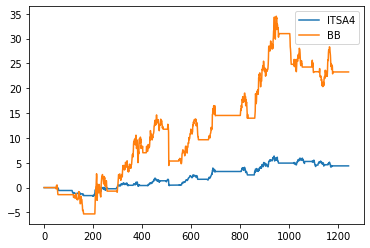

In [84]:
#to finish, I´ll compare the wealth created in both companies during the last 5 years
it['Wealth'] = it['Profit'].cumsum()
bb['Wealth'] = bb['Profit'].cumsum()
it['Wealth'].plot(label='ITSA4')
bb['Wealth'].plot(label='BB')
plt.legend()
plt.show()